# Plot Fit Error for QNM Frequencies

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Import needed packages from positive
from positive import *
# Import other usefuls
from os.path import expanduser
from kerr import *
import pickle
from numpy import *
from scipy.io import loadmat
# Import MATLAB derived cwfit
from kerr.formula.ksm2_cw import CW as cwfit
#
from matplotlib.pyplot import *

(positive)>> Applying custom matplotlib settings.


## Generate Fit Residuals

In [2]:
#
N = 61
jf_lim = 0.995
jf = jf_lim*sin(linspace(-pi/2,pi/2,N))

#
cw = {}
CW = {}
for k in cwfit.keys():
    l,m,n = k
    if m>0:
        CW[k] = array( [ leaver( j, l,m,n )[0] for j in jf ] )
        cw[k] = cwfit[k](jf)
        

In [3]:


res = {}
for k in cw.keys():
    res[k] = CW[k]-cw[k].conj()

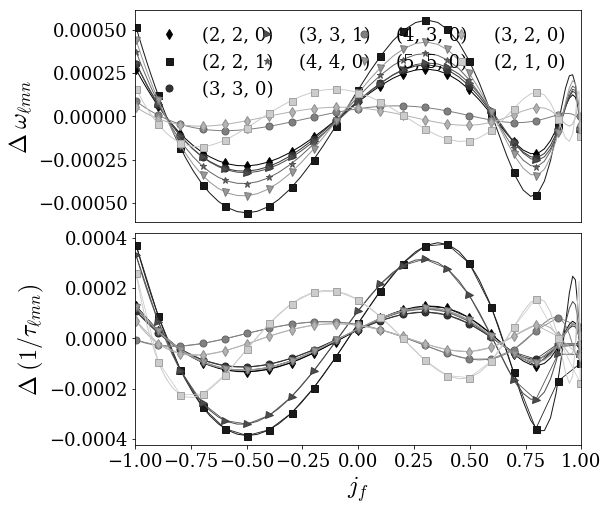

In [26]:

import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = mpl.rcParams['xtick.labelsize'] 

fig = figure( figsize = 2*figaspect(1) )

ax1 = subplot(2,1,1)
ax2 = subplot(2,1,2)
subplots_adjust(hspace = .05)
fs = 12

zlist = [ (2,2,0), (2,2,1), (3,3,0), (3,3,1), (4,4,0), (4,3,0), (5,5,0), (3,2,0), (2,1,0) ]
mkrlist = 'dso>*ovds'
lw,ms = 1,7
clr = 0.8*rgb( len(zlist), grayscale=True )

jf_spots = linspace(-1,1,21)*jf_lim

sca(ax1)
xticks([])
for k,z in enumerate(zlist):
    plot( jf, res[z].real, color=clr[k], lw=lw )
    plot( jf_spots, spline(jf,res[z].real)(jf_spots), ls='none',
         color=clr[k], marker=mkrlist[k], mec=0.8*clr[k], ms=ms, label=str(z)  )
#
legend(loc='best',mode='expand',ncol=4)
ylabel(r'$\Delta \; \omega_{\ell m n}$')

sca(ax2)    
for k,z in enumerate(zlist):
    plot( jf, res[z].imag, color=clr[k], lw=lw )
    plot( jf_spots, spline(jf,res[z].imag)(jf_spots), color=clr[k], marker=mkrlist[k], mec=0.8*clr[k], ms=ms  )
    
#
xlabel('$j_f$')
ylabel(r'$\Delta \; (1/\tau_{\ell m n})$')
    
#
for ax in [ax1,ax2]:
    sca(ax)
    xlim([-1,1])
    
#
savefig('/Users/book/KOALA/positive_dev/docs/mvfits_paper/fig/fits_res2.pdf',pad_inches=0, bbox_inches='tight')
